In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.table import Table

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 24,
    'axes.labelsize': 'large',
    'mathtext.fontset': 'stix'
})

from mpdg_som import SelfOrganizingMap
from mpdg_som_utils import SOM_LearningRateFunctions

import mpdg_som_utils

In [ ]:
#load in data produced in primary_targeting_region.ipynb
cut_data_file = '/data2/lsajkov/mpdg/data_products/GAMA/GAMA_primtarg_snr100_lms6_12_25jun2024.fits'

with fits.open(cut_data_file) as cat:
    GAMA_vect_data = Table(cat[1].data)

GAMA_vect_data.add_column(GAMA_vect_data['r_mag_err'], index = 4, name = 'surf_bright_r_err')

In [ ]:
SOM = SelfOrganizingMap([16, 16],
                        initialization = 'random')

In [ ]:
SOM.load_data(GAMA_vect_data['r_mag', 'gr_color', 'surf_bright_r'],
              variable_names = ['r_mag', 'gr_color', 'surf_bright_r'])

In [ ]:
SOM.load_standard_deviations(GAMA_vect_data['r_mag_err', 'gr_color_err', 'surf_bright_r_err'])

In [ ]:
SOM.build_SOM()

In [ ]:
fig = plt.figure()
for i, name in enumerate(SOM.variable_names):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.imshow(SOM.SOM[:, :, i], origin = 'lower', cmap = 'Spectral')
    ax.set_title(SOM.variable_names[i],
                 fontsize = 12)
    ax.axis('off')

In [ ]:
random_idx = np.random.rand(*SOM.mapsize) * SOM.data_len
random_idx = np.array(random_idx, dtype = int)

In [ ]:
weight_vectors = SOM.data[random_idx]

In [ ]:
distances = np.full(SOM.mapsize, np.nan)
iteration_map = np.nditer(distances, flags = ['multi_index'])

for _ in iteration_map:
    chi_sq_dist = mpdg_som_utils.chi_sq_dist(weight_vectors[*iteration_map.multi_index],
                                             SOM.data[45],
                                             data_dim = 3)
    distances[*iteration_map.multi_index] = chi_sq_dist


argmin_idx = np.argmin(distances)
argmin_coords = np.unravel_index(argmin_idx, SOM.mapsize)

In [ ]:
np.shape(weight_vectors)[:-1]

In [ ]:
distances = np.full(SOM.mapsize, np.nan)
iteration_map = np.nditer(distances, flags = ['multi_index'])

for _ in iteration_map:
    euclid_dist = np.linalg.norm(np.array(argmin_coords) -\
                                 np.array(iteration_map.multi_index))
    distances[*iteration_map.multi_index] = euclid_dist

In [ ]:
argmin_coords

In [ ]:
plt.imshow(np.exp(-distances**2/3))

In [ ]:
count = 0
for i, _ in enumerate(np.shape(n_dim_map)):
    for ii in range(np.shape(n_dim_map)[i]):
        count += 1
        print(count)

In [ ]:
[mpdg_som_utils.chi_sq_dist(weight_vector = weight_vectors[ii, jj],
                           data_vector = SOM.data[0],
                           data_dim = 3) for ii in ]
mpdg_som_utils.chi_sq_dist(weight_vector = weight_vectors,
                           data_vector = SOM.data[0],
                           data_dim = 3)

In [ ]:
if (~use_covariance) & (data_dim is not None):
    covar_matrix = np.diagflat([1] * data_dim)

elif (~use_covariance) & (data_dim is None):
    raise(ValueError('Please pass a dimensionality for the data (number of variables).'))

elif (use_covariance) & (covar_vector is None):
    raise(ValueError('There is no covariance matrix for the given data vector!'))

covar_matrix = np.diagflat(covar_vector)
inv_covar_matrix = linalg.inv(covar_matrix)

vector_difference = data_vector - weight_vector

np.dot(np.dot(vector_difference, inv_covar_matrix),vector_difference)

In [ ]:
for i in np.nditer

In [ ]:
plt.imshow(np.ones(SOM.mapsize))

___

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.table import Table

from mpdg_som import SelfOrganizingMap
from mpdg_som_utils import SOM_LearningRateFunctions

import mpdg_som_utils
#load in data produced in primary_targeting_region.ipynb
cut_data_file = '/data2/lsajkov/mpdg/data_products/GAMA/GAMA_primtarg_snr100_lms6_12_25jun2024.fits'

with fits.open(cut_data_file) as cat:
    GAMA_vect_data = Table(cat[1].data)

GAMA_vect_data = GAMA_vect_data[GAMA_vect_data['log_stellar_mass'] < 9.5]

GAMA_vect_data.add_column(GAMA_vect_data['r_mag_err'], index = 4, name = 'surf_bright_r_err')
SOM = SelfOrganizingMap([16, 16],
                        initialization = 'random')
SOM.load_data(GAMA_vect_data['r_mag', 'gr_color', 'surf_bright_r'],
              variable_names = ['r_mag', 'gr_color', 'surf_bright_r'])
SOM.load_standard_deviations(GAMA_vect_data['r_mag_err', 'gr_color_err', 'surf_bright_r_err'])
SOM.build_SOM()
random_idx = np.random.rand(*SOM.mapsize) * SOM.data_len
random_idx = np.array(random_idx, dtype = int)
weight_vectors = SOM.data[random_idx]

In [ ]:
step0_weights = weight_vectors.copy()

In [ ]:
step = 1
step1_weights = mpdg_som_utils.training_step(step0_weights,
                                             SOM.data[0],
                                             SOM.variances[0],
                                             step,
                                             mpdg_som_utils.SOM_LearningRateFunctions.power_law_lrf,
                                             (1000, 0.5),
                                             mpdg_som_utils.SOM_NeighborhoodFunctions.gaussian_nbh,
                                             (SOM.mapsize, 2))


In [ ]:
step = 1
step1_weights = step0_weights
for index in range(SOM.data_len):
    step1_weights = mpdg_som_utils.training_step(step1_weights,
                                                 SOM.data[index],
                                                 SOM.variances[index],
                                                 step,
                                                 mpdg_som_utils.SOM_LearningRateFunctions.power_law_lrf,
                                                 (1000, 0.5),
                                                 mpdg_som_utils.SOM_NeighborhoodFunctions.gaussian_nbh,
                                                 (SOM.mapsize, 2))

In [ ]:
fig = plt.figure()
for i, name in enumerate(SOM.variable_names):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.imshow(step0_weights[:, :, i], origin = 'lower', cmap = 'Spectral')
    ax.set_title(SOM.variable_names[i],
                 fontsize = 12)
    ax.axis('off')

In [ ]:
fig = plt.figure()
for i, name in enumerate(SOM.variable_names):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.imshow(step1_weights[:, :, i], origin = 'lower', cmap = 'Spectral')
    ax.set_title(SOM.variable_names[i],
                 fontsize = 12)
    ax.axis('off')

In [ ]:
np.max(step1_weights - step0_weights)

___

In [38]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.table import Table

from mpdg_som import SelfOrganizingMap

In [39]:
#load in data produced in primary_targeting_region.ipynb
cut_data_file = '/data2/lsajkov/mpdg/data_products/GAMA/GAMA_primtarg_snr100_lms6_12_25jun2024.fits'

with fits.open(cut_data_file) as cat:
    GAMA_vect_data = Table(cat[1].data)

GAMA_vect_data = GAMA_vect_data[GAMA_vect_data['log_stellar_mass'] < 9.5]

GAMA_vect_data.add_column(GAMA_vect_data['r_mag_err'], index = 4, name = 'surf_bright_r_err')

In [40]:
input_data = GAMA_vect_data['r_mag', 'gr_color', 'surf_bright_r']
input_vars = GAMA_vect_data['r_mag_err', 'gr_color_err', 'surf_bright_r_err']

In [41]:
normalization_params = {}

for variable in input_data.keys():
    normalization_params[variable] = {}

    normalization_params[variable]['mean'] = np.mean(GAMA_vect_data[variable])
    normalization_params[variable]['std']  = np.std(GAMA_vect_data[variable])

In [42]:
normalized_input_data = input_data.copy()
for variable in input_data.keys():
    
    normalized_input_data[variable] -= normalization_params[variable]['mean']
    normalized_input_data[variable] /= normalization_params[variable]['std']

In [43]:
SOM = SelfOrganizingMap([16, 16],
                        initialization = 'pca')

SOM.load_data(normalized_input_data,
              variable_names = ['r_mag', 'gr_color', 'surf_bright_r'])

SOM.load_standard_deviations(input_vars)

SOM.build_SOM()

| Data statistics 
stat	r_mag	gr_color	surf_bright_r	
min	-10.677	-4.797	-4.918	
max	2.086	3.339	3.399	
mean	-0.000	0.000	0.000	
median	0.162	-0.004	-0.093	
std	1.000	1.000	1.000	
| Initial SOM. Step 0. Initializaton: pca.


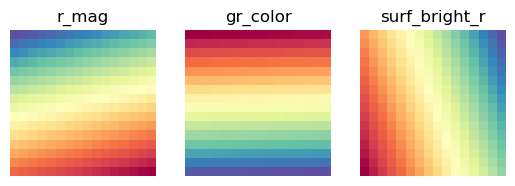

In [44]:
SOM.data_statistics()

print(f'\n| Initial SOM. Step 0. Initializaton: {SOM.initialization}.')
fig = plt.figure()
for i, name in enumerate(SOM.variable_names):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.imshow(SOM.weights_map[..., i], origin = 'lower', cmap = 'Spectral')
    ax.set_title(SOM.variable_names[i],
                 fontsize = 12)
    ax.axis('off')

In [45]:
SOM.train(debug_max_steps = 1)

| SOM after training. Step 1.


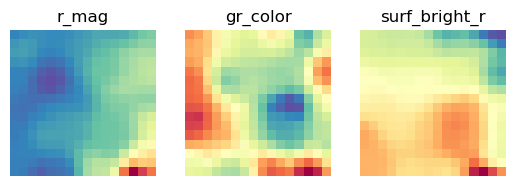

In [46]:
print(f'| SOM after training. Step {SOM.step}.')
fig = plt.figure()
for i, name in enumerate(SOM.variable_names):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.imshow(SOM.weights_map[..., i], origin = 'lower', cmap = 'Spectral')
    ax.set_title(SOM.variable_names[i],
                 fontsize = 12)
    ax.axis('off')

In [53]:
empty_mask = np.full_like(SOM.weights_map, True)
iteration_map = np.nditer(SOM.bmu_indices, flags = ['multi_index'])
for _ in iteration_map:
    if iteration_map.multi_index in SOM.bmu_indices:
        empty_mask[*iteration_map.multi_index] = False

IndexError: index 16 is out of bounds for axis 0 with size 16

In [51]:
np.unravel_index(iteration_map.multi_index, np.shape(empty_mask))

ValueError: index 768 is out of bounds for array with size 768

In [52]:
iteration_map.multi_index

(768, 0)

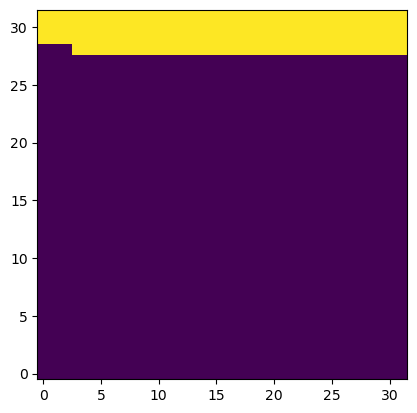

In [37]:
plt.imshow(empty_mask[..., 2], origin = 'lower')

In [25]:
iteration_map.multi_index

(0, 0, 0)

In [24]:
SOM.bmu_indices[0]

array([23., 15.])

In [ ]:
np.

___

Build PCA method

In [ ]:
SOM.data

In [ ]:
covar_matrix = np.cov(SOM.data, 
                      rowvar = False)
eig_res = np.linalg.eig(covar_matrix)

map_dimensionality = len(SOM.mapsize)

eigenvalues, eigenvectors = np.linalg.eig(covar_matrix)
pca_indices = eigenvalues.argsort()[-map_dimensionality:]
pca_vectors = eigenvectors[pca_indices]

principal_components = np.array([np.dot(SOM.data, pca_vector)\
                                 for pca_vector in pca_vectors])

In [ ]:
weight_map = np.full_like(SOM.weights_map, np.nan)
pca_map = np.meshgrid(*[np.linspace(np.min(principal_components[ii]),
                                    np.max(principal_components[ii]),
                                    SOM.mapsize[ii]) for ii in range(map_dimensionality)])

for ii in range(SOM.data_dim):
    weight_map[..., ii] = np.sum([pca_map[jj] * pca_vectors[:, ii][jj]\
                                  for jj in range(map_dimensionality)], axis = 0)

In [ ]:
plt.imshow(pca_map[0] * pca_vectors[:, 0][0] + pca_map[1] * pca_vectors[:, 0][1],
           cmap = 'Spectral')
# plt.imshow(pca_map[0] * pca_vectors[:, 1][0] + pca_map[1] * pca_vectors[:, 1][1],
#            cmap = 'Spectral')
# plt.imshow(pca_map[0] * pca_vectors[:, 2][0] + pca_map[1] * pca_vectors[:, 2][1],
#            cmap = 'Spectral')

In [ ]:
plt.imshow(weight_map[..., 2], cmap = 'Spectral')

In [ ]:
pca_map

In [ ]:
plt.imshow(pca_map[0])
plt.colorbar()

In [ ]:
pca_vectors

In [ ]:
principal_components

In [ ]:
np.meshgrid(np.linspace(np.min(principal_components[0]), np.max(principal_components[0]), SOM.mapsize[0]),
            np.linspace(np.min(principal_components[1]), np.max(principal_components[1]), SOM.mapsize[1]))

In [ ]:
np.linspace(np.min(principal_components[0]), np.max(principal_components[1]), SOM.mapsize[0])

In [ ]:
np.min(principal_components[0])
np.max(principal_components[0])

In [ ]:
np.dot(SOM.data, pca_vectors[0])

In [ ]:
var0_init = np.full(SOM.mapsize, np.nan)

for ii in SOM.mapsize[0]:
    for jj in SOM.mapsize[1]:
        var0_init[ii, jj] =         

In [ ]:
SOM.SOM

In [ ]:
pca_indices

In [ ]:
len(SOM.mapsize)

In [ ]:
eig_res.eigenvalues

In [ ]:
eig_res.eigenvalues.argsort()[::-1]

In [ ]:
eigvecs = eig_res.eigenvectors

In [ ]:
np.linalg.norm(eigvecs[2])

In [ ]:
SOM.mapsize